In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("occurrence.txt", sep="\t")
df.head()

,gbifID,accessRights,bibliographicCitation,language,license,modified,publisher,references,rightsHolder,type,...,publishedByGbifRegion,level0Gid,level0Name,level1Gid,level1Name,level2Gid,level2Name,level3Gid,level3Name,iucnRedListCategory
0,4012475068,NaN,NaN,en,CC_BY_4_0,NaN,NaN,NaN,NaN,Text,...,EUROPE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LC
1,4012475067,NaN,NaN,en,CC_BY_4_0,NaN,NaN,NaN,NaN,Dataset,...,EUROPE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LC
2,4012475066,NaN,NaN,en,CC_BY_4_0,NaN,NaN,NaN,NaN,Event,...,EUROPE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LC
3,4012475065,NaN,NaN,en,CC_BY_4_0,NaN,NaN,NaN,NaN,Text,...,EUROPE,ATA,Antarctica,NaN,NaN,NaN,NaN,NaN,NaN,LC
4,4012475064,NaN,NaN,en,CC_BY_4_0,NaN,NaN,NaN,NaN,Text,...,EUROPE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LC


In [2]:
# Get shape and column info
print("\nShape of data:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Shape of data: (4768, 223)

Column names:
['gbifID', 'accessRights', 'bibliographicCitation', 'language', 'license', 'modified', 'publisher', 'references', 'rightsHolder', 'type', 'institutionID', 'collectionID', 'datasetID', 'institutionCode', 'collectionCode', 'datasetName', 'ownerInstitutionCode', 'basisOfRecord', 'informationWithheld', 'dataGeneralizations', 'dynamicProperties', 'occurrenceID', 'catalogNumber', 'recordNumber', 'recordedBy', 'recordedByID', 'individualCount', 'organismQuantity', 'organismQuantityType', 'sex', 'lifeStage', 'reproductiveCondition', 'caste', 'behavior', 'vitality', 'establishmentMeans', 'degreeOfEstablishment', 'pathway', 'georeferenceVerificationStatus', 'occurrenceStatus', 'preparations', 'disposition', 'associatedOccurrences', 'associatedReferences', 'associatedSequences', 'associatedTaxa', 'otherCatalogNumbers', 'occurrenceRemarks', 'organismID', 'organismName', 'organismScope', 'associatedOrganisms', 'previousIdentifications', 'organismRemarks', 

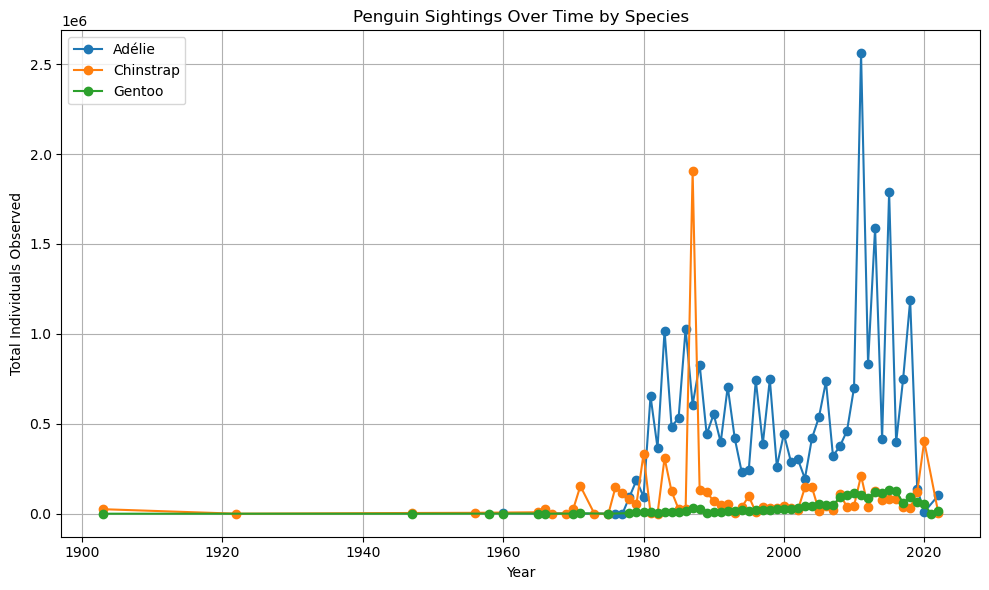

In [3]:


# Step 1: Load the dataset
df = pd.read_csv("occurrence.txt", sep="\t")

# Step 2: Clean 'year' and 'individualCount'
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df = df[df['year'].between(1900, 2025)]  # realistic year range

df['organismQuantity'] = pd.to_numeric(df['organismQuantity'], errors='coerce').fillna(0)

# Step 3: Define the scientific names of interest
target_species = {
    'Adélie': 'Pygoscelis adeliae (Hombron & Jacquinot, 1841)',
    'Chinstrap': 'Pygoscelis antarcticus (J.R.Forster, 1781)',
    'Gentoo': 'Pygoscelis papua (J.R.Forster, 1781)'
}

# Step 4: Group and plot
plt.figure(figsize=(10, 6))

for common_name, sci_name in target_species.items():
    species_df = df[df['scientificName'] == sci_name]
    grouped = species_df.groupby('year')['organismQuantity'].sum()
    grouped.sort_index().plot(label=common_name, marker='o')
    

plt.title("Penguin Sightings Over Time by Species")
plt.xlabel("Year")
plt.ylabel("Total Individuals Observed")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



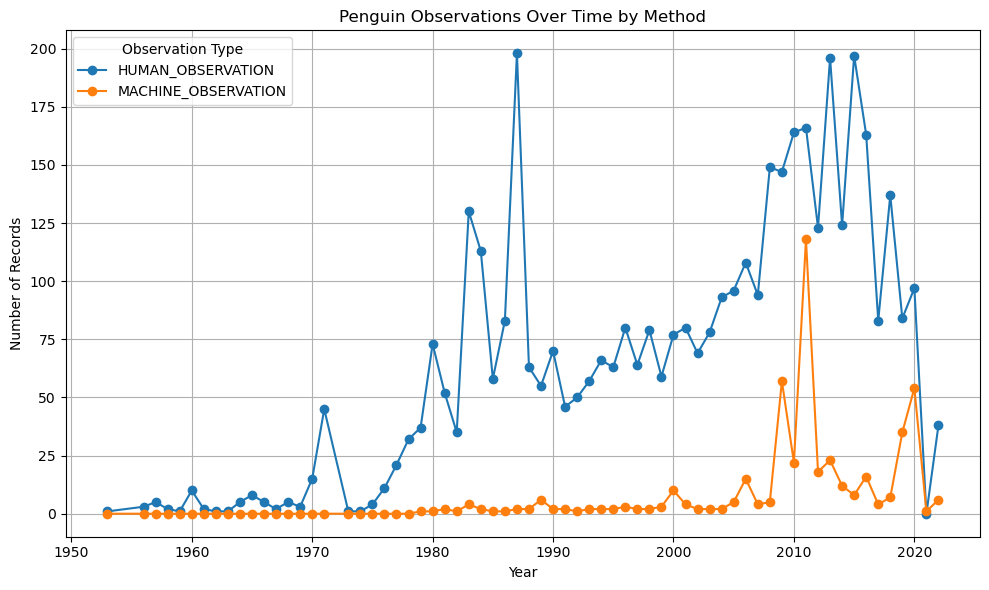

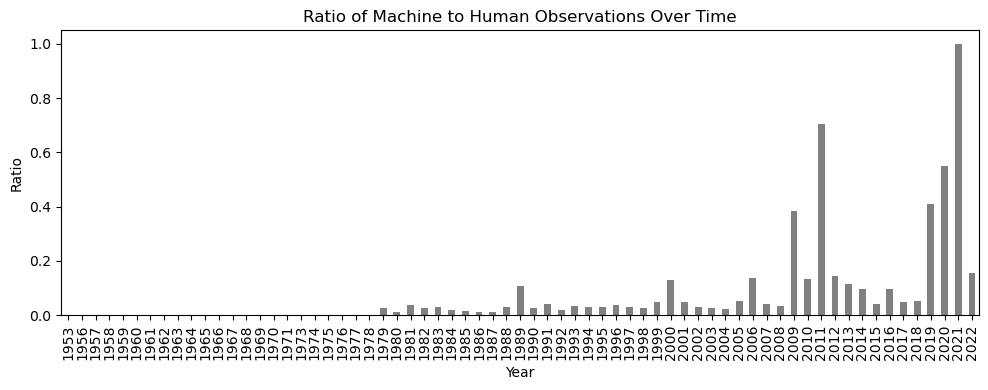

In [4]:
# Filter: Only keep rows with known observation method and realistic years
obs_df = df[df['basisOfRecord'].isin(['HUMAN_OBSERVATION', 'MACHINE_OBSERVATION'])]
obs_df = obs_df[obs_df['year'].between(1950, 2025)]

# Group by year and observation type
obs_trend = obs_df.groupby(['year', 'basisOfRecord']).size().unstack(fill_value=0)

# Plot 1: Total number of sightings by observation type
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
obs_trend.plot(kind='line', marker='o', ax=plt.gca())
plt.title("Penguin Observations Over Time by Method")
plt.ylabel("Number of Records")
plt.xlabel("Year")
plt.grid(True)
plt.legend(title="Observation Type")
plt.tight_layout()
plt.show()

# Optional Plot 2: Ratio of Machine to Human Observations
obs_trend['Machine/Human Ratio'] = obs_trend['MACHINE_OBSERVATION'] / (obs_trend['HUMAN_OBSERVATION'] + 1)

plt.figure(figsize=(10, 4))
obs_trend['Machine/Human Ratio'].plot(kind='bar', color='gray')
plt.title("Ratio of Machine to Human Observations Over Time")
plt.ylabel("Ratio")
plt.xlabel("Year")
plt.tight_layout()
plt.show()


In [5]:
!pip install xarray netCDF4


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [6]:
sst_df = pd.read_csv("nceiSSTdata.csv", skiprows=[1])  # skips units row
sst_df['time'] = pd.to_datetime(sst_df['time'])

# Optional: set datetime index
sst_df.set_index('time', inplace=True)

# Resample to monthly averages
sst_monthly = sst_df['sst'].resample('M').mean()

# Resample to yearly averages
sst_yearly = sst_df['sst'].resample('Y').mean()

# Preview
sst_yearly.head()


time
1981-12-31 00:00:00+00:00   -1.387018
1982-12-31 00:00:00+00:00   -0.751890
1983-12-31 00:00:00+00:00   -0.643644
1984-12-31 00:00:00+00:00   -0.465246
1985-12-31 00:00:00+00:00   -0.237370
Freq: A-DEC, Name: sst, dtype: float64

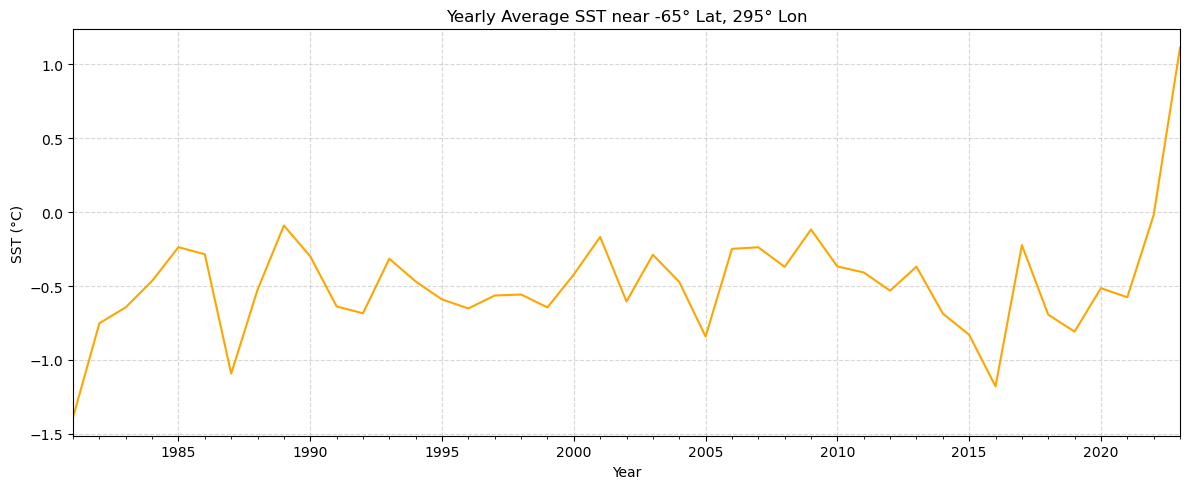

In [7]:
plt.figure(figsize=(12, 5))
sst_yearly.plot(color='orange')
plt.title("Yearly Average SST near -65° Lat, 295° Lon")
plt.xlabel("Year")
plt.ylabel("SST (°C)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [8]:
# STEP 1: Filter Adelie data and extract year
adelie_df = df[df['scientificName'] == 'Pygoscelis adeliae (Hombron & Jacquinot, 1841)'].copy()
adelie_df['year'] = pd.to_numeric(adelie_df['year'], errors='coerce')
adelie_df = adelie_df[adelie_df['year'].between(1981, 2025)]  # align with SST years

# STEP 2: Group by year and sum observed individuals
sightings_per_year = adelie_df.groupby('year')['organismQuantity'].sum()
sightings_per_year.index = pd.to_datetime(sightings_per_year.index.astype(str), format='%Y')

# STEP 3: Ensure both indexes are tz-naive
sightings_per_year.index = sightings_per_year.index.tz_localize(None)
sst_yearly.index = sst_yearly.index.tz_localize(None)

# STEP 4: Convert datetime index to year
sightings_per_year.index = sightings_per_year.index.year
sst_yearly.index = sst_yearly.index.year

# STEP 5: Find common years in both datasets
common_years = sightings_per_year.index.intersection(sst_yearly.index)

# STEP 6: Align datasets to the common years
sightings_aligned = sightings_per_year.loc[common_years]
sst_aligned = sst_yearly.loc[common_years]

# STEP 7: Merge both datasets into a single DataFrame
merged_df = pd.DataFrame({
    'sightings': sightings_aligned,
    'sst': sst_aligned
})
merged_df.dropna(inplace=True)

# STEP 8: Confirm the result
print(merged_df.info())
print(merged_df.head())




<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, 1981 to 2022
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sightings  41 non-null     float64
 1   sst        41 non-null     float64
dtypes: float64(2)
memory usage: 820.0 bytes
None
      sightings       sst
1981   653835.0 -1.387018
1982   365848.0 -0.751890
1983  1018244.0 -0.643644
1984   483161.0 -0.465246
1985   532899.0 -0.237370


In [9]:
common_years = sightings_per_year.index.intersection(sst_yearly.index)
sightings_aligned = sightings_per_year.loc[common_years]
sst_aligned = sst_yearly.loc[common_years]

merged_df = pd.DataFrame({
    'sightings': sightings_aligned,
    'sst': sst_aligned
})
merged_df.dropna(inplace=True)



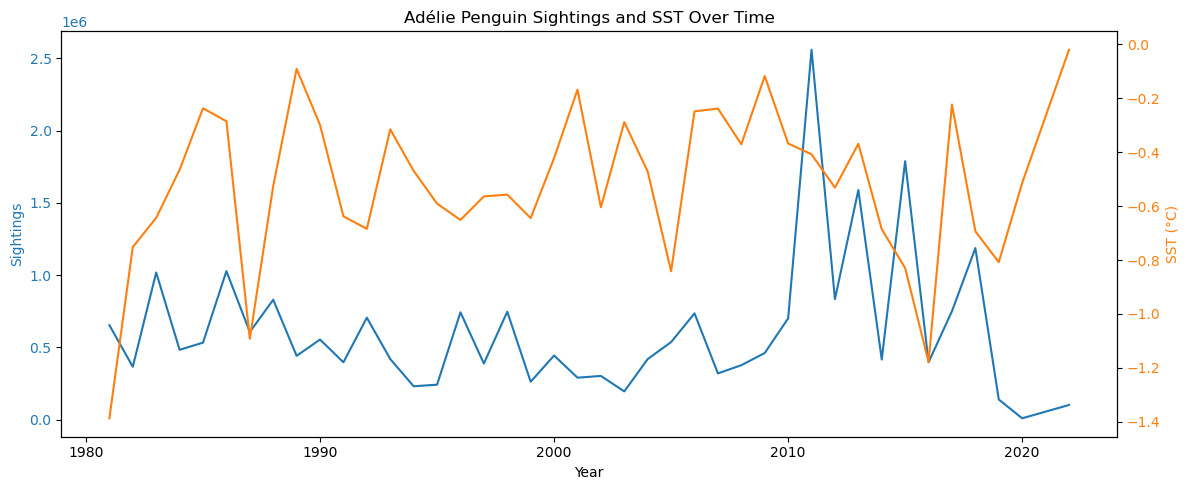

In [10]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 5))

# Plot sightings on left y-axis
ax1.set_title("Adélie Penguin Sightings and SST Over Time")
ax1.set_xlabel("Year")
ax1.set_ylabel("Sightings", color="tab:blue")
ax1.plot(merged_df.index, merged_df['sightings'], color="tab:blue", label="Sightings")
ax1.tick_params(axis='y', labelcolor="tab:blue")

# Plot SST on right y-axis
ax2 = ax1.twinx()
ax2.set_ylabel("SST (°C)", color="tab:orange")
ax2.plot(merged_df.index, merged_df['sst'], color="tab:orange", label="SST")
ax2.tick_params(axis='y', labelcolor="tab:orange")

fig.tight_layout()
plt.show()


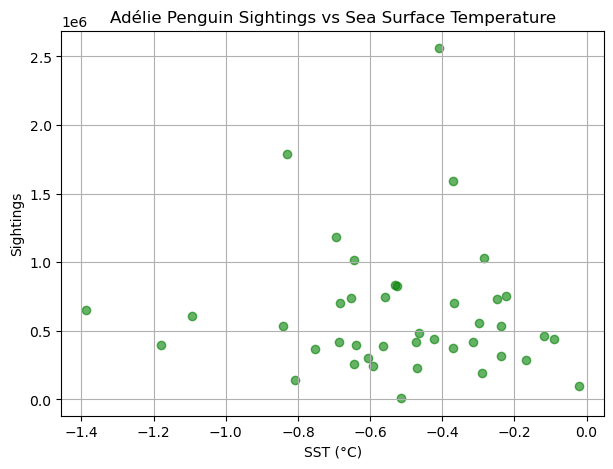

Pearson correlation between SST and Sightings: -0.065


In [11]:
plt.figure(figsize=(7, 5))
plt.scatter(merged_df['sst'], merged_df['sightings'], color='green', alpha=0.6)
plt.title("Adélie Penguin Sightings vs Sea Surface Temperature")
plt.xlabel("SST (°C)")
plt.ylabel("Sightings")
plt.grid(True)
plt.show()

correlation = merged_df['sightings'].corr(merged_df['sst'])
print(f"Pearson correlation between SST and Sightings: {correlation:.3f}")


In [12]:
print(merged_df.info())
print("\nSample rows:")
print(merged_df.head(10))


<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, 1981 to 2022
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sightings  41 non-null     float64
 1   sst        41 non-null     float64
dtypes: float64(2)
memory usage: 820.0 bytes
None

Sample rows:
      sightings       sst
1981   653835.0 -1.387018
1982   365848.0 -0.751890
1983  1018244.0 -0.643644
1984   483161.0 -0.465246
1985   532899.0 -0.237370
1986  1027875.0 -0.285288
1987   606558.0 -1.092110
1988   829654.0 -0.525492
1989   441477.0 -0.091096
1990   554322.0 -0.299233
